In [1]:
# Parameters
secretsPath = "/home/runner/work/_temp/secrets.json"
Start = "True"


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import date
from IPython.display import display, Markdown
%matplotlib inline

In [3]:
# This is the data for all of Wisconsin.
url = "https://opendata.arcgis.com/datasets/b913e9591eae4912b33dc5b4e88646c5_10.csv"
data = pd.read_csv(url, parse_dates=['LoadDttm'])

In [4]:
dc = data.groupby('NAME').get_group('Dunn').sort_values(by='LoadDttm') # Select the data for Dunn County from the full data.
PNi = dc.columns.get_loc("POS_NEW")
dc['7_DAY'] = dc.iloc[:,PNi].rolling(window=7).mean() # Calculates the rolling 7-day average of new cases.

## Cummulative number of cases in Dunn County, WI.

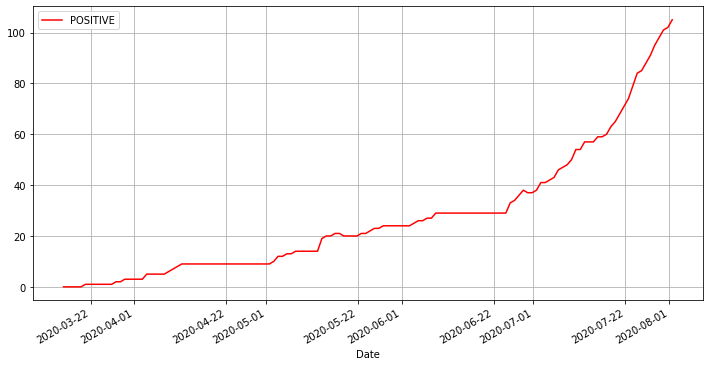

In [5]:
dc.plot(x='LoadDttm',y='POSITIVE',color='red',grid='True',figsize=(12,6)).set_xlabel('Date');

## Rolling 7-day average of new cases.

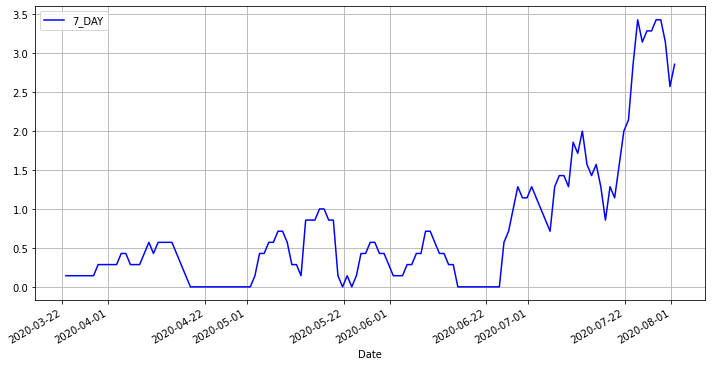

In [6]:
dc.plot(kind='line',x='LoadDttm',y='7_DAY',color='blue',grid='True',figsize=(12,6)).set_xlabel('Date');

In [7]:
display(Markdown('Last updated: ' + dc.iloc[-1]['LoadDttm'].strftime("%B %d, %Y")))

Last updated: August 01, 2020

Data source: [Wisconsin Department of Health Services](https://data.dhsgis.wi.gov/datasets/covid-19-historical-data-table/)